### Task 6 - Prediction using Decision Tree Algorithm

<ol>
<li>Create the Decision Tree classifier and visualize it graphically.</li>
<li>The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly</li>
</ol>

#### By Amitkumar Rautray

### Importing Libraries

In [44]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from prettytable import PrettyTable

### Loading Dataset

In [120]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [123]:
# Scalling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [124]:
df = pd.DataFrame(df)
print(df.head(),"\n",df.shape)

target = iris.target
target = pd.DataFrame(target)
print(target.shape)

          0         1         2         3
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444 
 (150, 4)
(150, 1)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### Cross validation and Splitting

In [118]:
def cross_val_test(fold,splits,X,y):
    
    if fold=="kf":
        mod = KFold( n_splits=splits)
    elif fold=="skf":
        mod = StratifiedKFold(splits)
    elif fold=="sss":
        mod =StratifiedShuffleSplit(splits)

    c = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
    scores = cross_val_score(c,X,y, cv=mod)

    #print(mod,"\nAccuracy",scores.mean())
    return scores.mean()


def plot_graph(X,y):
    mod=["kf","skf","sss"]
    df = pd.DataFrame(columns=['Splits','KFold','Stratified_KFold','Stratified_Shuffle_split'])
    t = PrettyTable(['Splits', '         KFold         ',
                     ' Stratified_KFold ','Stratified_Shuffle_split'])
    temp=[]
    temp.clear()
    for i in range(2,11):
        temp.append(i)
        for j in mod:
            curr=cross_val_test(j,i,X,y)
            temp.append(round(curr*100,2))
        t.add_row(temp)
        df.loc[i-2]=temp
        temp.clear()

    print(t)
    plt.plot(df.Splits,df.KFold,color='b')
    plt.plot(df.Splits,df.Stratified_KFold,color='g')
    plt.plot(df.Splits,df.Stratified_Shuffle_split,color='r')

    plt.xlabel('Number of Splits')
    plt.ylabel('Mean Score')
    plt.gca().legend(('KFold','Stratified','Shuffle Split'))
    plt.show()

+--------+-------------------------+--------------------+--------------------------+
| Splits |          KFold          |  Stratified_KFold  | Stratified_Shuffle_split |
+--------+-------------------------+--------------------+--------------------------+
|   2    |          30.67          |       95.33        |          100.0           |
|   3    |           0.0           |        96.0        |          93.33           |
|   4    |          88.57          |        96.0        |          93.33           |
|   5    |          91.33          |       95.33        |           92.0           |
|   6    |          91.33          |       95.33        |          95.56           |
|   7    |          95.24          |       93.32        |          92.38           |
|   8    |          95.98          |       96.05        |           92.5           |
|   9    |          93.95          |       95.38        |          97.04           |
|   10   |          92.67          |        96.0        |        

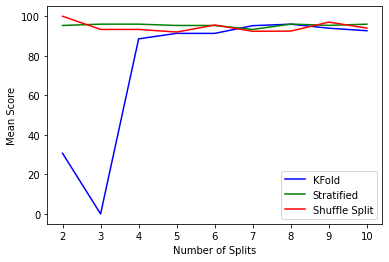

<Figure size 720x720 with 0 Axes>

In [119]:
plot_graph(df,target)

We can infer that 8 splits will be suitable

In [55]:
sss = StratifiedShuffleSplit(n_splits=8, random_state=0,test_size=0.2)

for train_index, test_index in sss.split(df, target):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    
print("X train shape",X_train.shape)
print("X test shape",X_test.shape)
print("Y train shape",y_test.shape)
print("Y test shape",y_test.shape)

X train shape (120, 4)
X test shape (30, 4)
Y train shape (30, 1)
Y test shape (30, 1)


### Finding the optimum depth

In [102]:
print("accuracy\tdepth")
for depth in range (2,7,1):
    clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=depth,
                                 random_state=0,
                                 min_samples_split=8)
    clf = clf.fit(X_train,y_train)
    print(round(clf.score(X_test,y_test),2),"\t\t",depth)


accuracy	depth
0.83 		 2
0.97 		 3
0.97 		 4
0.97 		 5
0.97 		 6


We infer to choose max_depth = 4

### Now let us define the Decision Tree Algorithm

In [106]:
# Defining the decision tree algorithm

dtree = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=depth,
                                 random_state=0,
                                 min_samples_split=8)
dtree.fit(df,target)

print('Decision Tree Classifer Created with accuracy')

print(round(dtree.score(X_test,y_test)*100,2))

Decision Tree Classifer Created with accuracy
96.67


### Model Evaluation

In [114]:
from sklearn import metrics
import seaborn as sns
print(metrics.classification_report(y_test,dtree.predict(X_test)))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Let us visualize the Decision Tree to understand it better.



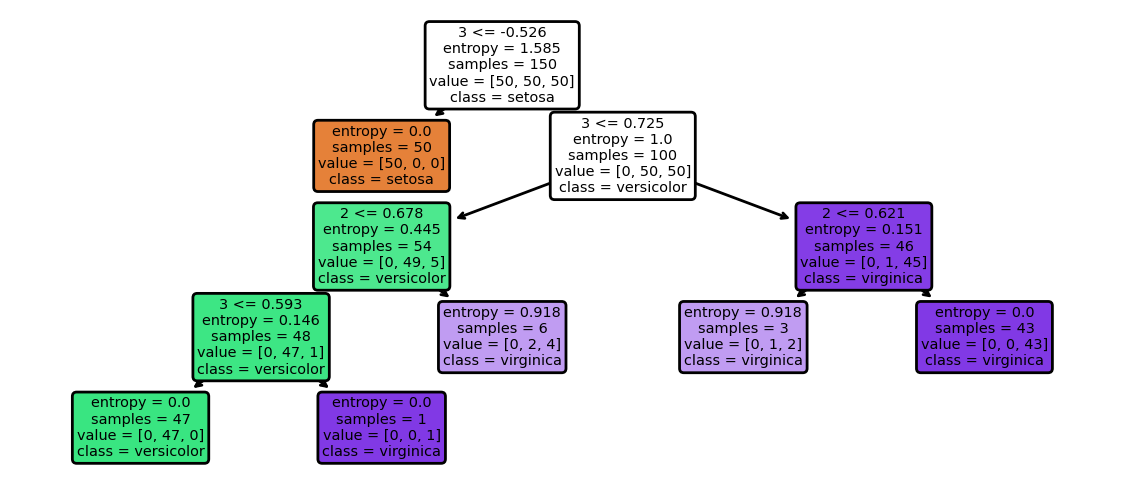

In [96]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,3), dpi = 200)

tree.plot_tree(dtree,
               feature_names = df.columns, 
               class_names= ['setosa', 'versicolor', 'virginica'] ,
               rounded= True,
               filled = True);

### Conclusion:
<ol>
<li>The model accuracy is 98.67%.</li>
<li>Optimal depth for model is 4.</li>
<li>The validation splits is 8 performed by Stratified K Fold method.</li>
<li>We can clearly see model performance by classification report.</li>
</ol>